## Self-Driving Car Project
Please do step by step below to finish project! 

In [ ]:
# Mount to google drive if use Google Colab
from google.colab import drive
drive.mount('/content/drive/')

### 1.Check version of some libraries

In [1]:
import tensorflow as tf
import keras 

In [2]:
# Check version of Tensorflow
print("Version of Tensorflow:",tf.__version__)

# Check version of Keras
print("Version of Keras:",tf.keras.__version__)

Version of Tensorflow: 2.6.0
Version of Keras: 2.6.0


### 2. Collecting data if data is not available for you.
       Please use Simulator to collect data
       
       I got the data from link which was provided: 
       
       https://drive.google.com/file/d/15tKiIPchIPS2oZv9ustBLQxPFY8lof5N/view?usp=sharing

### 3. Data processing

In [3]:
# # Unzip file data.zip on Google Drive if use Google Colab
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/data_udacity.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()
!ls -la /tmp

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/data_udacity.zip'

In [3]:
# Data analysis
import glob
imgs = glob.glob('data/IMG/**/*.jpg', recursive=True)
print(len(imgs))

24108


In [4]:
def showImage(stringNameImage):
    image = mpimg.imread(stringNameImage)
    plt.figure()
    plt.imshow(image)

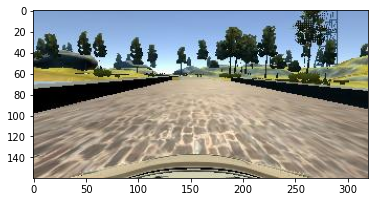

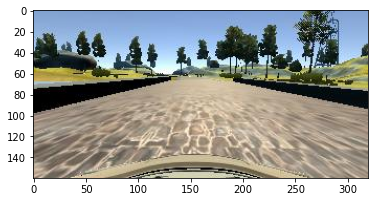

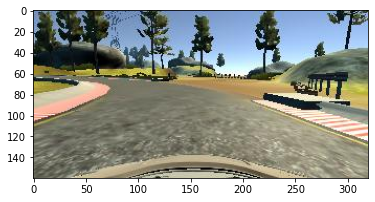

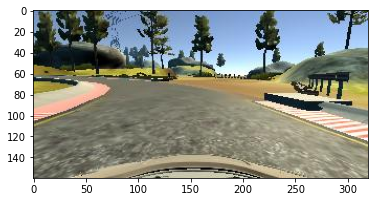

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for stringNameImage in imgs[0:4]:
    showImage(stringNameImage)

In [7]:
#ls

In [8]:
#cd data

In [9]:
#ls

In [6]:
import pandas as pd
# Use pandas to read csv file dataset
df = pd.read_csv('data/driving_log.csv')

# Show some samples of dataset
df.head(2)

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.14829
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.87963


(array([6.000e+00, 7.000e+00, 1.010e+02, 3.940e+02, 5.767e+03, 1.405e+03,
        3.040e+02, 4.400e+01, 6.000e+00, 2.000e+00]),
 array([-0.9426954 , -0.74842586, -0.55415632, -0.35988678, -0.16561724,
         0.0286523 ,  0.22292184,  0.41719138,  0.61146092,  0.80573046,
         1.        ]),
 <a list of 10 Patch objects>)

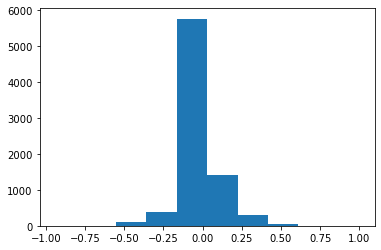

In [7]:
# get value of camera center, left, right
X = df[['center', 'left', 'right']].values

# Get the car's steering angle
y = df['steering'].values

# draw histogram
plt.hist(y)

The Graph above is show that, almost datas have zero steering angle. Thus that, most of time the car goes straight

(array([6.000e+00, 7.000e+00, 1.010e+02, 3.940e+02, 2.406e+03, 1.405e+03,
        3.040e+02, 4.400e+01, 6.000e+00, 2.000e+00]),
 array([-0.9426954 , -0.74842586, -0.55415632, -0.35988678, -0.16561724,
         0.0286523 ,  0.22292184,  0.41719138,  0.61146092,  0.80573046,
         1.        ]),
 <a list of 10 Patch objects>)

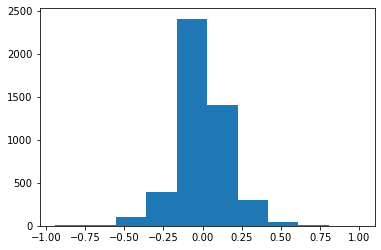

In [8]:
import numpy as np
# Loại bỏ và chỉ lấy 1000 dữ liệu có góc lái ở 0
pos_zero = np.array(np.where(y==0)).reshape(-1, 1)
pos_none_zero = np.array(np.where(y!=0)).reshape(-1, 1)
np.random.shuffle(pos_zero)
pos_zero = pos_zero[:1000]

pos_combined = np.vstack((pos_zero, pos_none_zero))
pos_combined = list(pos_combined)

y = y[pos_combined].reshape(len(pos_combined))
X = X[pos_combined, :].reshape((len(pos_combined), 3))

# After process
plt.hist(y)

Because most of time the car goes straight, so to avoid the model has wrong predict with case turn left and turn right, we should remove some of the values Zero steering angle

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Split dataset to 2 parts: train dataset and validation dataset as below:
# 85% the dataset is train dataset
# 15% the dataset is validation dataset

X = df[['center', 'left', 'right']]
y = df['steering']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=0)

train_dataset = pd.concat([X_train, y_train], axis=1)
valid_dataset = pd.concat([X_valid, y_valid], axis=1)
# # Show size of train dataset
print(train_dataset.shape)
# # Show size of validation dataset
print(valid_dataset.shape)

(6830, 4)
(1206, 4)


In [10]:
#!pip install utils
#!pip install keras_applications
#!pip install opencv-python

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from keras.models import Sequential 
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, Dropout, Dense, Flatten
from keras.regularizers import l2

In [12]:
import cv2
import numpy as np
import sklearn
import matplotlib.pyplot as plt

#code for generator
def generator(dataframe, samples, batch_size=32):
    num_samples = len(samples)
    while 1:
        shuffle(samples) #shuffling the total images
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]
            images = []
            angles = []
    
        
        for index in batch_samples.index:
                # We are taking 3 images, first one is center, second is left and third is right
                for i in range(0,3): 
                    name = 'data/IMG/'+dataframe.iloc[index,i].split('/')[-1]
                    # Since CV2 reads an image in BGR we need to convert it to RGB since in drive.py it is RGB
                    center_image = cv2.cvtColor(cv2.imread(name),cv2.COLOR_BGR2RGB)
                    # Getting the steering angle measurement                        
                    center_angle = float(dataframe.iloc[index,3])
                    images.append(center_image)
                    
                    # Introducing correction for left and right images
                    # If image is in left we increase the steering angle by 0.2
                    # If image is in right we decrease the steering angle by 0.2
                    
                    # Image is in center
                    if(i==0):
                        angles.append(center_angle)
                    # Image is in left
                    elif(i==1):
                        angles.append(center_angle + 0.2)
                    # Image is in right
                    elif(i==2):
                        angles.append(center_angle - 0.2)
                    
                    # Code for Augmentation of data.
                    # We take the image and just flip it and negate the measurement
                    
                    images.append(cv2.flip(center_image,1))
                    if(i==0):
                        angles.append((center_angle)*-1)
                    elif(i==1):
                        angles.append((center_angle + 0.2)*-1)
                    elif(i==2):
                        angles.append((center_angle - 0.2)*-1)
                    #here we got 6 images from one image    
                    
    
        X_train = np.array(images)
        y_train = np.array(angles)
        # Here we do not hold the values of X_train and y_train instead we yield the values which means we hold until the generator is running
        yield (X_train, y_train)
    

### 4. Build Nvidia-CNN deep learning model 

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers import Lambda, Cropping2D
from keras.layers.convolutional import Convolution2D

In [14]:
model = Sequential()

# Preprocess incoming data, centered around zero with small standard deviation 
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))

# crop image to only see section with road use Cropping2D
model.add(Cropping2D(cropping = ((50,20),(0,0))))           

# Build CNN - Nvidia model in here
model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2),activation='relu'))
model.add(Conv2D(filters=36, kernel_size=(5, 5),strides=(2, 2), activation='relu'))
model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3) ,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(units=1164, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(1))

# the output is the steering angle
# loss function is the right choice for this regression problem
# optimizer is used here
model.compile(loss='mse', optimizer='adam')

# keras method to print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d (Cropping2D)      (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d (Conv2D)              (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 77, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 37, 48)         43248     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 35, 64)         27712     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 33, 64)         3

### 5. Training Nvidia-CNN deep learning model

In [15]:
# Using the generator function to create "train_generator" and "validation_generator" with batch_size = 32 or 64 or 128,...
train_generator = generator(df,train_dataset, batch_size=32)
validation_generator = generator(df, valid_dataset, batch_size=32)

In [16]:
#fit generator is used here as the number of images are generated by the generator

tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
history = model.fit_generator(train_generator, 
                              validation_data=validation_generator, 
                              validation_steps= len(valid_dataset) // 32, 
                              steps_per_epoch=len(train_dataset) // 32,
                              epochs = 5,
                              callbacks=[tbCallBack])

# Saving model by following with format: Model_[team's name].h5. For example: Model_AI-team.h5
model.save('Model_AI-team2.h5')

print('Done! Model Saved!')

c:\users\user\.conda\envs\ai_training\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
213/213 [==============================] - 76s 356ms/step - loss: 0.0025 - val_loss: 0.0203
Epoch 2/5
213/213 [==============================] - 72s 339ms/step - loss: 1.6670e-04 - val_loss: 0.0192
Epoch 3/5
213/213 [==============================] - 76s 355ms/step - loss: 1.1810e-04 - val_loss: 0.0184
Epoch 4/5
213/213 [==============================] - 76s 357ms/step - loss: 1.0183e-04 - val_loss: 0.0179
Epoch 5/5
213/213 [==============================] - 75s 354ms/step - loss: 7.5247e-05 - val_loss: 0.0182
Done! Model Saved!


### 6. Evaluate Nvidia-CNN deep learning model

In [ ]:
#Visualize learning gragh (loss, accuracy)in here
print(history.history)
!tensorboard --logdir ./Graph

### 7. Use saved model above to test model by simulator application

In [21]:
#model = keras.models.load_model('Model_AI_team2.h5')

for index in valid_dataset.index[:50]:
    # Lấy ảnh chính giữa từ tập valid
    name = 'data/IMG/'+ df.iloc[index,0].split('/')[-1]
    # Since CV2 reads an image in BGR we need to convert it to RGB since in drive.py it is RGB
    center_image = cv2.cvtColor(cv2.imread(name),cv2.COLOR_BGR2RGB)
    # Getting the steering angle measurement                        
    center_angle = float(df.iloc[index,3])
    predict_angle = model.predict(np.array([center_image]))
    # showImage(name)
    print('real angle:', center_angle, 'predict angle:', predict_angle[0][0], '\n======================================')
# result = model.predict(x_valid[0])

real angle: 0.0 predict angle: -0.21873757 
real angle: 0.0 predict angle: -0.16725506 
real angle: 0.4253641 predict angle: 0.2719861 
real angle: 0.3488158 predict angle: 0.04925438 
real angle: 0.0 predict angle: -0.07204324 
real angle: 0.0 predict angle: 0.056629974 
real angle: 0.0 predict angle: -0.14121838 
real angle: -0.0787459 predict angle: -0.16795644 
real angle: -0.2591387 predict angle: -0.18646292 
real angle: 0.0 predict angle: 0.03689713 
real angle: 0.0 predict angle: -0.057883285 
real angle: 0.0 predict angle: -0.2160858 
real angle: 0.0 predict angle: -0.15187006 
real angle: 0.1287396 predict angle: -0.020739684 
real angle: 0.0 predict angle: -0.009432266 
real angle: -0.002791043 predict angle: 0.19176862 
real angle: 0.0 predict angle: -0.14486836 
real angle: 0.0 predict angle: -0.13475053 
real angle: 0.0 predict angle: -0.18198313 
real angle: 0.2052879 predict angle: 0.15212645 
real angle: 0.3009732 predict angle: 0.016507268 
real angle: -0.03127411 pre

# Good luck!